<a href="https://colab.research.google.com/github/carlosvr0/PL-SQL_REPO/blob/main/CheatSheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PL/SQL**

###Procedural Language/Structured Query Language.

---

##Describir la estructura general de un bloque PL/SQL (con un ejemplo)











**DECLARE**

    -- Declaraciones de variables y tipos de datos

        v_numero INTEGER;

**BEGIN**

    -- Código PL/SQL

        v_numero := 10;
        IF v_numero > 5 THEN
            DBMS_OUTPUT.PUT_LINE('El número es mayor que 5.');
        ELSE
            DBMS_OUTPUT.PUT_LINE('El número es menor o igual a 5.');
        END IF;

**EXCEPTION**

    -- Manejo de excepciones

      WHEN OTHERS THEN
        DBMS_OUTPUT.PUT_LINE('Se ha producido un error: ' || SQLERRM);
    
**END;**


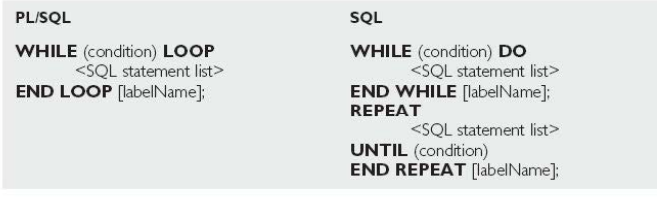

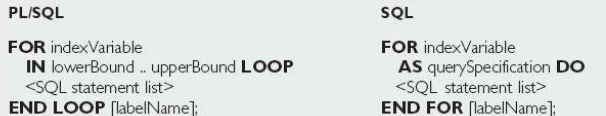

##¿Cómo se hacen declaraciones de variables y constantes? Proponga ejemplos con distintos tipos de datos.

##Explicar las instrucciones de control de PL/SQL, ilustre sus respuestas por medio de ejemplos.

##Explique cómo se declaran y usan los procedimientos/funciones por medio de ejemplos.

##¿Qué es una excepción, cuáles son sus tipos y cómo se hace el manejo de excepciones?

##¿Qué son los cursores de SQL y cómo se declaran?  ilustre esto con un ejemplo.


##¿Qué son los triggers y para qué pueden ser utilizados?

## Diferencias entre los triggers  BEFORE, AFTER, e  INSTEAD OF